In [7]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np

In [9]:
csv_path = "/Users/matthewsimon/Projects/solopro/test/Daylio_Abid.csv"
df = pd.read_csv(csv_path)

# Quick peek at the data
df.head()

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


In [10]:
# Let's examine the date range in our dataset
print("Dataset info:")
print(f"Total rows: {len(df)}")
print(f"Date range: {df['full_date'].min()} to {df['full_date'].max()}")
print(f"Unique dates: {df['full_date'].nunique()}")

# Convert full_date to datetime for easier filtering
df['full_date_dt'] = pd.to_datetime(df['full_date'], format='%d/%m/%Y')

print(f"\nDateTime range: {df['full_date_dt'].min()} to {df['full_date_dt'].max()}")

Dataset info:
Total rows: 940
Date range: 01/01/2019 to 31/12/2020
Unique dates: 775

DateTime range: 2018-02-03 00:00:00 to 2021-04-16 00:00:00


In [11]:
# Filter data from 16/04/2020 through 16/04/2021
start_date = pd.to_datetime('16/04/2020', format='%d/%m/%Y')
end_date = pd.to_datetime('16/04/2021', format='%d/%m/%Y')

# Create the filtered dataframe
df_filtered = df[(df['full_date_dt'] >= start_date) & (df['full_date_dt'] <= end_date)]

print(f"Filtered dataset info:")
print(f"Original rows: {len(df)}")
print(f"Filtered rows: {len(df_filtered)}")
print(f"Filtered date range: {df_filtered['full_date'].min()} to {df_filtered['full_date'].max()}")
print(f"Filtered datetime range: {df_filtered['full_date_dt'].min()} to {df_filtered['full_date_dt'].max()}")

# Display first few rows of filtered data
print(f"\nFirst 5 rows of filtered data:")
df_filtered.head()

Filtered dataset info:
Original rows: 940
Filtered rows: 372
Filtered date range: 01/01/2021 to 31/12/2020
Filtered datetime range: 2020-04-16 00:00:00 to 2021-04-16 00:00:00

First 5 rows of filtered data:


,full_date,date,weekday,time,sub_mood,activities,mood,full_date_dt
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,2021-04-16
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,2021-04-15
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,2021-04-14
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,2021-04-13
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,2021-04-12


In [13]:
# Replace the original dataframe with the filtered one
df = df_filtered.copy()

# Optional: Remove the temporary datetime column if you don't need it
# df = df.drop('full_date_dt', axis=1)

print(f"✅ Dataset successfully filtered!")
print(f"Working with {len(df)} rows from {df['full_date'].min()} to {df['full_date'].max()}")
print(f"Date range: {df['full_date_dt'].min().strftime('%d/%m/%Y')} to {df['full_date_dt'].max().strftime('%d/%m/%Y')}")
print(f"\nYour filtered dataset is now ready for analysis!")

✅ Dataset successfully filtered!
Working with 372 rows from 01/01/2021 to 31/12/2020
Date range: 16/04/2020 to 16/04/2021

Your filtered dataset is now ready for analysis!


In [14]:
# Let's first examine the unique values in our key columns to understand the data better
print("Unique moods:")
print(df['mood'].unique())
print(f"\nMood distribution:")
print(df['mood'].value_counts())

print(f"\nUnique sub_moods (first 20):")
print(df['sub_mood'].unique()[:20])

print(f"\nSample activities (first 5 rows):")
for i in range(5):
    print(f"Row {i}: {df.iloc[i]['activities']}")

Unique moods:
['Good' 'Normal' 'Awful' 'Amazing' 'Bad']

Mood distribution:
mood
Good       183
Normal      84
Amazing     60
Bad         23
Awful       22
Name: count, dtype: int64

Unique sub_moods (first 20):
['yolo' 'focused ' 'confused ' 'wondering' 'angry' 'blessed ' 'excited '
 'Chill' 'hungry ' 'happiest day' 'weak' 'meh' 'awful' 'Cool' 'worried '
 'over the moon ' 'triggered ' 'sad af' 'scared ' 'good']

Sample activities (first 5 rows):
Row 0: reading | Art | prayer | fasting  | walk | meditation  | shower | writing | Watching series  | good meal | reddit | language learning  | streaming  | youtube | cooking | travel | cleaning | new things  | power nap | Documentary  | penpal | coding 
Row 1: reading | learning  | Art | prayer | fasting  | walk | meditation  | shower | Audio books  | writing | Watching series  | good meal | reddit | language learning  | shave  | streaming  | youtube | cooking | cleaning | research  | new things  | power nap | repair | Documentary  | penpal |

In [15]:
def create_daily_summary(row):
    """
    Create a tweet-style daily summary (~250 chars) based on mood, sub_mood, activities, and time
    """
    date = row['date']
    weekday = row['weekday'] 
    time = row['time']
    mood = row['mood']
    sub_mood = row['sub_mood'].strip()
    activities = row['activities']
    
    # Parse activities (they're separated by |)
    activity_list = [act.strip() for act in activities.split('|') if act.strip()]
    
    # Group similar activities for more natural summaries
    spiritual = [act for act in activity_list if any(word in act.lower() for word in ['prayer', 'fasting', 'quran', 'meditation'])]
    learning = [act for act in activity_list if any(word in act.lower() for word in ['reading', 'learning', 'coding', 'language', 'tutorial', 'documentary'])]
    creative = [act for act in activity_list if any(word in act.lower() for word in ['art', 'writing', 'designing', 'cooking'])]
    wellness = [act for act in activity_list if any(word in act.lower() for word in ['walk', 'shower', 'sleep', 'power nap', 'good meal'])]
    entertainment = [act for act in activity_list if any(word in act.lower() for word in ['watching', 'series', 'youtube', 'streaming', 'reddit', 'podcast'])]
    
    # Start building the summary
    summary_parts = []
    
    # Add a mood-based opening
    mood_intros = {
        'Amazing': f"Amazing {weekday}!",
        'Good': f"Good {weekday}.",
        'Normal': f"Regular {weekday}.",
        'Bad': f"Tough {weekday}.",
        'Awful': f"Challenging {weekday}."
    }
    
    summary_parts.append(mood_intros.get(mood, f"{weekday}."))
    
    # Add activities in a natural flow
    activity_descriptions = []
    
    if spiritual:
        if len(spiritual) > 2:
            activity_descriptions.append("focused on spiritual practices")
        elif 'prayer' in str(spiritual).lower():
            activity_descriptions.append("spent time in prayer and reflection")
        else:
            activity_descriptions.append("engaged in mindful practices")
    
    if learning:
        if len(learning) > 2:
            activity_descriptions.append("dove deep into learning")
        elif 'reading' in str(learning).lower():
            activity_descriptions.append("immersed in reading and study")
        else:
            activity_descriptions.append("focused on personal growth")
    
    if creative:
        if len(creative) > 1:
            activity_descriptions.append("explored creative pursuits")
        else:
            activity_descriptions.append(f"engaged in {creative[0].lower()}")
    
    if wellness:
        activity_descriptions.append("prioritized self-care")
    
    if entertainment:
        activity_descriptions.append("enjoyed some entertainment")
    
    # Combine activity descriptions
    if activity_descriptions:
        if len(activity_descriptions) == 1:
            summary_parts.append(f"I {activity_descriptions[0]}.")
        elif len(activity_descriptions) == 2:
            summary_parts.append(f"I {activity_descriptions[0]} and {activity_descriptions[1]}.")
        else:
            summary_parts.append(f"I {', '.join(activity_descriptions[:-1])}, and {activity_descriptions[-1]}.")
    
    # Add sub_mood context if meaningful
    sub_mood_lower = sub_mood.lower()
    if sub_mood_lower not in ['', 'good', 'normal'] and sub_mood_lower != mood.lower():
        if sub_mood_lower in ['focused', 'blessed', 'excited', 'chill']:
            summary_parts.append(f"Feeling {sub_mood_lower}.")
        elif sub_mood_lower in ['confused', 'worried', 'triggered']:
            summary_parts.append(f"Though feeling {sub_mood_lower}.")
        elif sub_mood_lower == 'yolo':
            summary_parts.append("Living life to the fullest!")
        elif sub_mood_lower == 'happiest day':
            summary_parts.append("One of my happiest days!")
    
    # Add time context for late entries
    if 'am' in time.lower() and int(time.split(':')[0]) < 6:
        summary_parts.append("Late night reflections.")
    
    # Combine all parts
    full_summary = " ".join(summary_parts)
    
    # Trim to ~250 characters if needed
    if len(full_summary) > 250:
        full_summary = full_summary[:247] + "..."
    
    return full_summary

# Apply the function to create summaries
print("Creating daily summaries...")
df['summary'] = df.apply(create_daily_summary, axis=1)
print("✅ Summary column added!")

# Show a few examples
print(f"\nSample summaries:")
for i in range(3):
    print(f"\nRow {i+1} ({df.iloc[i]['full_date']}):")
    print(f"Mood: {df.iloc[i]['mood']} | Sub-mood: {df.iloc[i]['sub_mood']}")
    print(f"Summary: {df.iloc[i]['summary']}")
    print(f"Length: {len(df.iloc[i]['summary'])} characters")

Creating daily summaries...
✅ Summary column added!

Sample summaries:

Row 1 (16/04/2021):
Mood: Good | Sub-mood: yolo
Summary: Good Friday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Living life to the fullest!
Length: 182 characters

Row 2 (15/04/2021):
Mood: Good | Sub-mood: focused 
Summary: Good Thursday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Feeling focused. Late night reflections.
Length: 197 characters

Row 3 (14/04/2021):
Mood: Normal | Sub-mood: confused 
Summary: Regular Wednesday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Though feeling confused. Late night reflections.
Length: 209 characters


In [16]:
# Verify all rows have summaries
print(f"Total rows: {len(df)}")
print(f"Rows with summaries: {df['summary'].notna().sum()}")
print(f"Summary length stats:")
summary_lengths = df['summary'].str.len()
print(f"  Average: {summary_lengths.mean():.1f} characters")
print(f"  Min: {summary_lengths.min()} characters") 
print(f"  Max: {summary_lengths.max()} characters")

# Display the updated dataframe structure
print(f"\nDataframe columns: {list(df.columns)}")

# Show a few more diverse examples
print(f"\nMore summary examples:")
sample_indices = [10, 50, 100, 150, 200]
for idx in sample_indices:
    if idx < len(df):
        row = df.iloc[idx]
        print(f"\n{row['full_date']} ({row['weekday']}) - {row['mood']} mood:")
        print(f"'{row['summary']}'")

# Show the dataframe with the new summary column
print(f"\nFirst 3 rows with summary column:")
display_cols = ['full_date', 'weekday', 'mood', 'sub_mood', 'summary']
df[display_cols].head(3)

Total rows: 372
Rows with summaries: 372
Summary length stats:
  Average: 164.5 characters
  Min: 85 characters
  Max: 209 characters

Dataframe columns: ['full_date', 'date', 'weekday', 'time', 'sub_mood', 'activities', 'mood', 'full_date_dt', 'summary']

More summary examples:

06/04/2021 (Tuesday) - Good mood:
'Good Tuesday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Feeling focused.'

25/02/2021 (Thursday) - Good mood:
'Good Thursday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Feeling blessed. Late night reflections.'

06/01/2021 (Wednesday) - Good mood:
'Good Wednesday. I engaged in mindful practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Feeling blessed.'

18/11/2020 (Wednesday) - Good mood:
'Good Wednesday. I focuse

,full_date,weekday,mood,sub_mood,summary
0,16/04/2021,Friday,Good,yolo,"Good Friday. I focused on spiritual practices,..."
1,15/04/2021,Thursday,Good,focused,Good Thursday. I focused on spiritual practice...
2,14/04/2021,Wednesday,Normal,confused,Regular Wednesday. I focused on spiritual prac...


In [17]:
# Export the enhanced dataframe to CSV
output_path = "/Users/matthewsimon/Projects/solopro/test/Daylio_Abid_with_summaries.csv"

# Save to CSV
df.to_csv(output_path, index=False)

print(f"✅ CSV file exported successfully!")
print(f"📁 File location: {output_path}")
print(f"📊 Exported data:")
print(f"   - {len(df)} rows")
print(f"   - {len(df.columns)} columns: {list(df.columns)}")
print(f"   - Date range: {df['full_date_dt'].min().strftime('%d/%m/%Y')} to {df['full_date_dt'].max().strftime('%d/%m/%Y')}")

# Show file size
import os
file_size = os.path.getsize(output_path)
print(f"   - File size: {file_size:,} bytes ({file_size/1024:.1f} KB)")

print(f"\n📥 Your CSV file is ready for download!")
print(f"💡 The file includes your original data plus the new 'summary' column with tweet-style daily summaries.")

✅ CSV file exported successfully!
📁 File location: /Users/matthewsimon/Projects/solopro/test/Daylio_Abid_with_summaries.csv
📊 Exported data:
   - 372 rows
   - 9 columns: ['full_date', 'date', 'weekday', 'time', 'sub_mood', 'activities', 'mood', 'full_date_dt', 'summary']
   - Date range: 16/04/2020 to 16/04/2021
   - File size: 179,176 bytes (175.0 KB)

📥 Your CSV file is ready for download!
💡 The file includes your original data plus the new 'summary' column with tweet-style daily summaries.


In [18]:
# Preview the exported CSV file to verify it was saved correctly
print("📋 Preview of exported CSV file:")
print("="*50)

# Read back the CSV to verify
df_verify = pd.read_csv(output_path)
print(f"Verified: {len(df_verify)} rows and {len(df_verify.columns)} columns")

# Show the column headers
print(f"\nColumn headers:")
for i, col in enumerate(df_verify.columns, 1):
    print(f"  {i}. {col}")

# Show first 2 rows with key columns
print(f"\nFirst 2 rows (key columns):")
preview_cols = ['full_date', 'weekday', 'mood', 'summary']
print(df_verify[preview_cols].head(2).to_string(index=False))

print(f"\n✅ Export verification complete - your CSV file is ready!")
print(f"📂 You can find it at: {output_path}")

📋 Preview of exported CSV file:
Verified: 372 rows and 9 columns

Column headers:
  1. full_date
  2. date
  3. weekday
  4. time
  5. sub_mood
  6. activities
  7. mood
  8. full_date_dt
  9. summary

First 2 rows (key columns):
 full_date  weekday mood                                                                                                                                                                                               summary
16/04/2021   Friday Good                Good Friday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Living life to the fullest!
15/04/2021 Thursday Good Good Thursday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, prioritized self-care, and enjoyed some entertainment. Feeling focused. Late night reflections.

✅ Export verification complete - your CSV file is ready!
📂 You can find it at: /Users/matthewsimon/P

In [19]:
# DAILY LOG FORM MAPPING ANALYSIS
# =====================================

print("🔍 DAILY LOG FORM vs CSV DATA MAPPING ANALYSIS")
print("=" * 60)

print("\n📊 YOUR CSV DATA COLUMNS:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

# Let's show a sample row and how it maps
sample_row = df.iloc[0]
print(f"\n📅 SAMPLE ROW: {sample_row['full_date']} ({sample_row['weekday']})")
print(f"Original mood: {sample_row['mood']}")
print(f"Sub-mood: {sample_row['sub_mood']}")
print(f"Summary: {sample_row['summary'][:100]}...")

print(f"\n🎯 DAILY LOG FORM FIELD MAPPING:")
print("=" * 40)

# 1. Mood Mapping
mood_mapping = {
    'Amazing': 10,
    'Good': 8, 
    'Normal': 5,
    'Bad': 3,
    'Awful': 1
}

print(f"1️⃣ OVERALL MOOD SLIDER (1-10):")
mapped_mood = mood_mapping.get(sample_row['mood'], 5)
print(f"   CSV 'mood': '{sample_row['mood']}' → Form value: {mapped_mood}/10")

# 2. Activities Analysis
activities = sample_row['activities'].split('|')
activities_clean = [act.strip().lower() for act in activities if act.strip()]

exercise_activities = ['walk', 'exercise', 'gym', 'run', 'bike', 'sport']
sleep_keywords = ['sleep', 'power nap', 'nap', 'rest']
work_activities = ['coding', 'learning', 'tutorial', 'research', 'writing', 'documentary']
personal_activities = ['art', 'cooking', 'meditation', 'prayer', 'reading', 'quran']

has_exercise = any(ex in ' '.join(activities_clean) for ex in exercise_activities)
work_count = sum(1 for work in work_activities if work in ' '.join(activities_clean))
personal_count = sum(1 for pers in personal_activities if pers in ' '.join(activities_clean))

print(f"\n2️⃣ EXERCISE CHECKBOX:")
print(f"   Has exercise activities: {has_exercise}")
exercise_found = [act for act in activities_clean if any(ex in act for ex in exercise_activities)]
print(f"   Exercise activities found: {exercise_found}")

print(f"\n3️⃣ WORK SATISFACTION SLIDER (1-10):")
# Base it on work activities + mood
work_satisfaction = min(10, max(1, (work_count * 1.5) + mood_mapping.get(sample_row['mood'], 5) - 2))
print(f"   Work activities count: {work_count}")
print(f"   Work activities: {[act for act in activities_clean if any(w in act for w in work_activities)]}")
print(f"   Calculated work satisfaction: {work_satisfaction:.0f}/10")

print(f"\n4️⃣ PERSONAL LIFE SATISFACTION SLIDER (1-10):")
personal_satisfaction = min(10, max(1, (personal_count * 1.2) + mood_mapping.get(sample_row['mood'], 5) - 1))
print(f"   Personal activities count: {personal_count}")
print(f"   Personal activities: {[act for act in activities_clean if any(p in act for p in personal_activities)]}")
print(f"   Calculated personal satisfaction: {personal_satisfaction:.0f}/10")

print(f"\n5️⃣ WORK-LIFE BALANCE SLIDER (1-10):")
# Good balance if both work and personal activities exist
if work_count > 0 and personal_count > 0:
    balance_score = min(10, 6 + mood_mapping.get(sample_row['mood'], 5) // 2)
elif work_count > 0 or personal_count > 0:
    balance_score = 4
else:
    balance_score = 2
print(f"   Has both work & personal: {work_count > 0 and personal_count > 0}")
print(f"   Calculated balance: {balance_score}/10")

print(f"\n6️⃣ SLEEP (hours):")
# Try to extract from time or estimate
if 'power nap' in ' '.join(activities_clean):
    estimated_sleep = 7.5  # Assume good sleep if taking naps
else:
    estimated_sleep = 7.0  # Default
print(f"   Estimated sleep hours: {estimated_sleep}")

print(f"\n7️⃣ TEXT FIELDS:")
print(f"   📝 HIGHLIGHTS (textarea):")
print(f"      Source: Use positive parts of summary + good mood activities")
if sample_row['mood'] in ['Amazing', 'Good']:
    highlight_text = f"Great day! {sample_row['summary'][:80]}..."
else:
    highlight_text = f"Found some positives: {', '.join(activities_clean[:3])}"
print(f"      Generated: \"{highlight_text}\"")

print(f"\n   📝 CHALLENGES (textarea):")
print(f"      Source: Use sub_mood + negative context from mood")
if sample_row['sub_mood'].strip().lower() in ['confused', 'angry', 'worried', 'triggered', 'sad', 'awful']:
    challenge_text = f"Feeling {sample_row['sub_mood'].strip()}, which made the day more difficult."
elif sample_row['mood'] in ['Bad', 'Awful']:
    challenge_text = f"Had a {sample_row['mood'].lower()} day overall, faced some difficulties."
else:
    challenge_text = "Overall positive day with minor challenges."
print(f"      Generated: \"{challenge_text}\"")

print(f"\n   📝 TOMORROW'S GOAL (textarea):")
print(f"      Source: Derive from patterns and missing activities")
tomorrow_goal = f"Continue with {', '.join(activities_clean[:2])} and maintain positive momentum."
print(f"      Generated: \"{tomorrow_goal}\"")

print(f"\n" + "=" * 60)
print(f"✨ COMPLETE FORM DATA for {sample_row['full_date']}:")
print(f"   overallMood: {mapped_mood}")
print(f"   workSatisfaction: {work_satisfaction:.0f}")
print(f"   personalLifeSatisfaction: {personal_satisfaction:.0f}")
print(f"   balanceRating: {balance_score}")
print(f"   sleep: {estimated_sleep}")
print(f"   exercise: {has_exercise}")
print(f"   highlights: \"{highlight_text}\"")
print(f"   challenges: \"{challenge_text}\"") 
print(f"   tomorrowGoal: \"{tomorrow_goal}\"")

🔍 DAILY LOG FORM vs CSV DATA MAPPING ANALYSIS

📊 YOUR CSV DATA COLUMNS:
   1. full_date
   2. date
   3. weekday
   4. time
   5. sub_mood
   6. activities
   7. mood
   8. full_date_dt
   9. summary

📅 SAMPLE ROW: 16/04/2021 (Friday)
Original mood: Good
Sub-mood: yolo
Summary: Good Friday. I focused on spiritual practices, dove deep into learning, explored creative pursuits, ...

🎯 DAILY LOG FORM FIELD MAPPING:
1️⃣ OVERALL MOOD SLIDER (1-10):
   CSV 'mood': 'Good' → Form value: 8/10

2️⃣ EXERCISE CHECKBOX:
   Has exercise activities: True
   Exercise activities found: ['walk']

3️⃣ WORK SATISFACTION SLIDER (1-10):
   Work activities count: 4
   Work activities: ['writing', 'language learning', 'documentary', 'coding']
   Calculated work satisfaction: 10/10

4️⃣ PERSONAL LIFE SATISFACTION SLIDER (1-10):
   Personal activities count: 5
   Personal activities: ['reading', 'art', 'prayer', 'meditation', 'cooking']
   Calculated personal satisfaction: 10/10

5️⃣ WORK-LIFE BALANCE SLIDER (1

In [20]:
def convert_csv_to_daily_log_form(row):
    """
    Convert a single CSV row into daily log form data format
    """
    # Mood mapping
    mood_mapping = {
        'Amazing': 10, 'Good': 8, 'Normal': 5, 'Bad': 3, 'Awful': 1
    }
    
    # Parse activities
    activities = row['activities'].split('|')
    activities_clean = [act.strip().lower() for act in activities if act.strip()]
    
    # Activity categories
    exercise_activities = ['walk', 'exercise', 'gym', 'run', 'bike', 'sport']
    work_activities = ['coding', 'learning', 'tutorial', 'research', 'writing', 'documentary']
    personal_activities = ['art', 'cooking', 'meditation', 'prayer', 'reading', 'quran']
    
    # Calculate metrics
    has_exercise = any(ex in ' '.join(activities_clean) for ex in exercise_activities)
    work_count = sum(1 for work in work_activities if work in ' '.join(activities_clean))
    personal_count = sum(1 for pers in personal_activities if pers in ' '.join(activities_clean))
    base_mood = mood_mapping.get(row['mood'], 5)
    
    # Calculate form values
    overall_mood = base_mood
    work_satisfaction = min(10, max(1, (work_count * 1.5) + base_mood - 2))
    personal_satisfaction = min(10, max(1, (personal_count * 1.2) + base_mood - 1))
    
    # Balance calculation
    if work_count > 0 and personal_count > 0:
        balance_rating = min(10, 6 + base_mood // 2)
    elif work_count > 0 or personal_count > 0:
        balance_rating = 4
    else:
        balance_rating = 2
    
    # Sleep estimation
    sleep_hours = 7.5 if 'power nap' in ' '.join(activities_clean) else 7.0
    
    # Text fields
    if row['mood'] in ['Amazing', 'Good']:
        highlights = f"Great day! {row['summary'][:100]}..."
    else:
        highlights = f"Found positives: {', '.join([act.title() for act in activities_clean[:3]])}"
    
    sub_mood_lower = row['sub_mood'].strip().lower()
    if sub_mood_lower in ['confused', 'angry', 'worried', 'triggered', 'sad', 'awful']:
        challenges = f"Feeling {row['sub_mood'].strip()}, which made the day more challenging."
    elif row['mood'] in ['Bad', 'Awful']:
        challenges = f"Had a {row['mood'].lower()} day overall, faced some difficulties."
    else:
        challenges = "Overall positive day with minor challenges."
    
    tomorrow_goal = f"Continue with {', '.join([act.title() for act in activities_clean[:2]])} and maintain positive momentum."
    
    return {
        'date': row['full_date'],
        'weekday': row['weekday'],
        'form_data': {
            'overallMood': int(overall_mood),
            'workSatisfaction': int(work_satisfaction),
            'personalLifeSatisfaction': int(personal_satisfaction),
            'balanceRating': int(balance_rating),
            'sleep': sleep_hours,
            'exercise': has_exercise,
            'highlights': highlights,
            'challenges': challenges,
            'tomorrowGoal': tomorrow_goal
        },
        'original_mood': row['mood'],
        'original_summary': row['summary']
    }

# Convert all rows to form data
print("🔄 Converting all CSV rows to Daily Log Form format...")
form_data_list = []

for index, row in df.iterrows():
    form_entry = convert_csv_to_daily_log_form(row)
    form_data_list.append(form_entry)

print(f"✅ Converted {len(form_data_list)} entries!")

# Show a few examples
print(f"\n📋 SAMPLE FORM DATA ENTRIES:")
print("=" * 50)

for i in range(min(3, len(form_data_list))):
    entry = form_data_list[i]
    print(f"\n📅 {entry['date']} ({entry['weekday']}) - Original: {entry['original_mood']}")
    print("Form fields:")
    for field, value in entry['form_data'].items():
        if isinstance(value, str) and len(value) > 50:
            print(f"  {field}: \"{value[:50]}...\"")
        else:
            print(f"  {field}: {value}")

# Create a DataFrame for form data
form_df_data = []
for entry in form_data_list:
    row_data = {
        'date': entry['date'],
        'weekday': entry['weekday'],
        'original_mood': entry['original_mood']
    }
    # Add form fields
    for field, value in entry['form_data'].items():
        row_data[f'form_{field}'] = value
    form_df_data.append(row_data)

form_df = pd.DataFrame(form_df_data)
print(f"\n📊 Form data DataFrame created with {len(form_df)} rows and {len(form_df.columns)} columns")
print(f"Columns: {list(form_df.columns)}")

🔄 Converting all CSV rows to Daily Log Form format...
✅ Converted 372 entries!

📋 SAMPLE FORM DATA ENTRIES:

📅 16/04/2021 (Friday) - Original: Good
Form fields:
  overallMood: 8
  workSatisfaction: 10
  personalLifeSatisfaction: 10
  balanceRating: 10
  sleep: 7.5
  exercise: True
  highlights: "Great day! Good Friday. I focused on spiritual pra..."
  challenges: Overall positive day with minor challenges.
  tomorrowGoal: "Continue with Reading, Art and maintain positive m..."

📅 15/04/2021 (Thursday) - Original: Good
Form fields:
  overallMood: 8
  workSatisfaction: 10
  personalLifeSatisfaction: 10
  balanceRating: 10
  sleep: 7.5
  exercise: True
  highlights: "Great day! Good Thursday. I focused on spiritual p..."
  challenges: Overall positive day with minor challenges.
  tomorrowGoal: "Continue with Reading, Learning and maintain posit..."

📅 14/04/2021 (Wednesday) - Original: Normal
Form fields:
  overallMood: 5
  workSatisfaction: 10
  personalLifeSatisfaction: 10
  balanceRati

In [21]:
# Export the form-ready data
form_output_path = "/Users/matthewsimon/Projects/solopro/test/Daylio_Daily_Log_Form_Ready.csv"
form_df.to_csv(form_output_path, index=False)

print(f"✅ FORM-READY DATA EXPORTED!")
print(f"📁 File: {form_output_path}")

# Summary statistics
print(f"\n📊 FORM DATA SUMMARY:")
print("=" * 40)
print(f"Total entries: {len(form_df)}")
print(f"Date range: {form_df['date'].min()} to {form_df['date'].max()}")

print(f"\n🎯 FIELD STATISTICS:")
print(f"Average Overall Mood: {form_df['form_overallMood'].mean():.1f}/10")
print(f"Average Work Satisfaction: {form_df['form_workSatisfaction'].mean():.1f}/10") 
print(f"Average Personal Life: {form_df['form_personalLifeSatisfaction'].mean():.1f}/10")
print(f"Average Balance: {form_df['form_balanceRating'].mean():.1f}/10")
print(f"Average Sleep: {form_df['form_sleep'].mean():.1f} hours")
print(f"Exercise days: {form_df['form_exercise'].sum()}/{len(form_df)} ({form_df['form_exercise'].mean()*100:.1f}%)")

print(f"\n🏆 MOOD DISTRIBUTION:")
mood_dist = form_df['original_mood'].value_counts()
for mood, count in mood_dist.items():
    print(f"  {mood}: {count} days ({count/len(form_df)*100:.1f}%)")

print(f"\n💡 HOW TO USE THIS DATA:")
print("=" * 40)
print("1. Each row represents one day's form data")
print("2. 'form_*' columns contain the mapped values for your daily log form")
print("3. You can use this to:")
print("   • Auto-fill forms programmatically")
print("   • Analyze patterns in your data")
print("   • Import historical data into your app")
print("   • Create visualizations of your daily metrics")

print(f"\n📋 DAILY LOG FORM FIELD MAPPING COMPLETE!")
print(f"✨ You now have {len(form_df)} days of form-ready data!")

# Show file info
import os
file_size = os.path.getsize(form_output_path)
print(f"\n📦 File size: {file_size:,} bytes ({file_size/1024:.1f} KB)")
print(f"📥 Ready for download: {form_output_path}")

✅ FORM-READY DATA EXPORTED!
📁 File: /Users/matthewsimon/Projects/solopro/test/Daylio_Daily_Log_Form_Ready.csv

📊 FORM DATA SUMMARY:
Total entries: 372
Date range: 01/01/2021 to 31/12/2020

🎯 FIELD STATISTICS:
Average Overall Mood: 6.9/10
Average Work Satisfaction: 8.8/10
Average Personal Life: 8.6/10
Average Balance: 8.9/10
Average Sleep: 7.4 hours
Exercise days: 309/372 (83.1%)

🏆 MOOD DISTRIBUTION:
  Good: 183 days (49.2%)
  Normal: 84 days (22.6%)
  Amazing: 60 days (16.1%)
  Bad: 23 days (6.2%)
  Awful: 22 days (5.9%)

💡 HOW TO USE THIS DATA:
1. Each row represents one day's form data
2. 'form_*' columns contain the mapped values for your daily log form
3. You can use this to:
   • Auto-fill forms programmatically
   • Analyze patterns in your data
   • Import historical data into your app
   • Create visualizations of your daily metrics

📋 DAILY LOG FORM FIELD MAPPING COMPLETE!
✨ You now have 372 days of form-ready data!

📦 File size: 91,620 bytes (89.5 KB)
📥 Ready for download: /

In [22]:
# Check the structure of our latest dataframe (form_df) to identify score columns
print("🔍 ANALYZING FORM_DF STRUCTURE FOR SCORE COLUMNS:")
print("=" * 60)

print(f"DataFrame shape: {form_df.shape}")
print(f"\nAll columns:")
for i, col in enumerate(form_df.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\n🎯 SCORE COLUMNS IDENTIFIED:")
print("=" * 40)

# Identify columns that contain numerical scores (1-10 scale)
score_columns = [col for col in form_df.columns if 'form_' in col and 
                 col in ['form_overallMood', 'form_workSatisfaction', 
                        'form_personalLifeSatisfaction', 'form_balanceRating']]

print(f"Score columns to average: {score_columns}")

# Show sample values for these columns
print(f"\n📊 SAMPLE VALUES FOR SCORE COLUMNS:")
sample_row = form_df.iloc[0]
for col in score_columns:
    print(f"  {col}: {sample_row[col]}")

print(f"\n📈 STATISTICS FOR SCORE COLUMNS:")
for col in score_columns:
    values = form_df[col]
    print(f"  {col}:")
    print(f"    Min: {values.min()}, Max: {values.max()}, Mean: {values.mean():.2f}")

# Show first 3 rows with score columns
print(f"\n📋 FIRST 3 ROWS - SCORE COLUMNS:")
score_display = form_df[['date'] + score_columns].head(3)
print(score_display.to_string(index=False))

🔍 ANALYZING FORM_DF STRUCTURE FOR SCORE COLUMNS:
DataFrame shape: (372, 12)

All columns:
   1. date
   2. weekday
   3. original_mood
   4. form_overallMood
   5. form_workSatisfaction
   6. form_personalLifeSatisfaction
   7. form_balanceRating
   8. form_sleep
   9. form_exercise
  10. form_highlights
  11. form_challenges
  12. form_tomorrowGoal

🎯 SCORE COLUMNS IDENTIFIED:
Score columns to average: ['form_overallMood', 'form_workSatisfaction', 'form_personalLifeSatisfaction', 'form_balanceRating']

📊 SAMPLE VALUES FOR SCORE COLUMNS:
  form_overallMood: 8
  form_workSatisfaction: 10
  form_personalLifeSatisfaction: 10
  form_balanceRating: 10

📈 STATISTICS FOR SCORE COLUMNS:
  form_overallMood:
    Min: 1, Max: 10, Mean: 6.92
  form_workSatisfaction:
    Min: 1, Max: 10, Mean: 8.78
  form_personalLifeSatisfaction:
    Min: 1, Max: 10, Mean: 8.62
  form_balanceRating:
    Min: 2, Max: 10, Mean: 8.86

📋 FIRST 3 ROWS - SCORE COLUMNS:
      date  form_overallMood  form_workSatisfaction

In [23]:
# Add 'average_score' column by calculating the average of all score columns
print("➕ ADDING AVERAGE_SCORE COLUMN:")
print("=" * 50)

# Define the score columns to average
score_columns = ['form_overallMood', 'form_workSatisfaction', 
                'form_personalLifeSatisfaction', 'form_balanceRating']

print(f"Score columns being averaged: {score_columns}")

# Calculate the average score for each row
form_df['average_score'] = form_df[score_columns].mean(axis=1).round(2)

print(f"✅ Average score column added successfully!")

# Show statistics for the new column
print(f"\n📊 AVERAGE_SCORE STATISTICS:")
avg_scores = form_df['average_score']
print(f"  Min: {avg_scores.min()}")
print(f"  Max: {avg_scores.max()}")
print(f"  Mean: {avg_scores.mean():.2f}")
print(f"  Median: {avg_scores.median():.2f}")
print(f"  Std Dev: {avg_scores.std():.2f}")

# Show distribution
print(f"\n📈 AVERAGE_SCORE DISTRIBUTION:")
score_ranges = [
    (9.0, 10.0, "Excellent (9.0-10.0)"),
    (8.0, 8.99, "Very Good (8.0-8.99)"),
    (7.0, 7.99, "Good (7.0-7.99)"),
    (6.0, 6.99, "Above Average (6.0-6.99)"),
    (5.0, 5.99, "Average (5.0-5.99)"),
    (0.0, 4.99, "Below Average (0.0-4.99)")
]

for min_val, max_val, label in score_ranges:
    count = len(form_df[(form_df['average_score'] >= min_val) & (form_df['average_score'] <= max_val)])
    percentage = (count / len(form_df)) * 100
    print(f"  {label}: {count} days ({percentage:.1f}%)")

# Show sample rows with the new average_score column
print(f"\n📋 SAMPLE ROWS WITH AVERAGE_SCORE:")
sample_cols = ['date', 'form_overallMood', 'form_workSatisfaction', 
               'form_personalLifeSatisfaction', 'form_balanceRating', 'average_score']
print(form_df[sample_cols].head(5).to_string(index=False))

print(f"\n🎯 NEW DATAFRAME INFO:")
print(f"  Shape: {form_df.shape}")
print(f"  Total columns: {len(form_df.columns)}")
print(f"  New column position: {list(form_df.columns).index('average_score') + 1}")

➕ ADDING AVERAGE_SCORE COLUMN:
Score columns being averaged: ['form_overallMood', 'form_workSatisfaction', 'form_personalLifeSatisfaction', 'form_balanceRating']
✅ Average score column added successfully!

📊 AVERAGE_SCORE STATISTICS:
  Min: 2.25
  Max: 10.0
  Mean: 8.30
  Median: 9.25
  Std Dev: 1.86

📈 AVERAGE_SCORE DISTRIBUTION:
  Excellent (9.0-10.0): 221 days (59.4%)
  Very Good (8.0-8.99): 31 days (8.3%)
  Good (7.0-7.99): 43 days (11.6%)
  Above Average (6.0-6.99): 26 days (7.0%)
  Average (5.0-5.99): 19 days (5.1%)
  Below Average (0.0-4.99): 32 days (8.6%)

📋 SAMPLE ROWS WITH AVERAGE_SCORE:
      date  form_overallMood  form_workSatisfaction  form_personalLifeSatisfaction  form_balanceRating  average_score
16/04/2021                 8                     10                             10                  10           9.50
15/04/2021                 8                     10                             10                  10           9.50
14/04/2021                 5            

In [24]:
# Export the updated dataframe with average_score column
updated_output_path = "/Users/matthewsimon/Projects/solopro/test/Daylio_Daily_Log_Form_Ready_with_Average.csv"
form_df.to_csv(updated_output_path, index=False)

print(f"✅ UPDATED CSV EXPORTED WITH AVERAGE_SCORE COLUMN!")
print(f"📁 File: {updated_output_path}")

print(f"\n📊 FINAL DATAFRAME SUMMARY:")
print("=" * 50)
print(f"Total rows: {len(form_df)}")
print(f"Total columns: {len(form_df.columns)}")
print(f"Date range: {form_df['date'].min()} to {form_df['date'].max()}")

print(f"\n📋 ALL COLUMNS:")
for i, col in enumerate(form_df.columns, 1):
    if col == 'average_score':
        print(f"  {i:2d}. {col} ⭐ (NEW)")
    else:
        print(f"  {i:2d}. {col}")

# Show some interesting insights about the average scores
print(f"\n🏆 AVERAGE SCORE INSIGHTS:")
print("=" * 40)

# Best days
best_days = form_df.nlargest(5, 'average_score')[['date', 'original_mood', 'average_score']]
print(f"🥇 TOP 5 BEST DAYS (by average score):")
for _, row in best_days.iterrows():
    print(f"   {row['date']}: {row['average_score']}/10 (mood: {row['original_mood']})")

# Worst days  
worst_days = form_df.nsmallest(5, 'average_score')[['date', 'original_mood', 'average_score']]
print(f"\n📉 TOP 5 CHALLENGING DAYS (by average score):")
for _, row in worst_days.iterrows():
    print(f"   {row['date']}: {row['average_score']}/10 (mood: {row['original_mood']})")

# Monthly trends
form_df['month'] = pd.to_datetime(form_df['date'], format='%d/%m/%Y').dt.strftime('%Y-%m')
monthly_avg = form_df.groupby('month')['average_score'].mean().round(2)
print(f"\n📅 MONTHLY AVERAGE SCORES:")
for month, avg in monthly_avg.items():
    print(f"   {month}: {avg}/10")

# Show file size
import os
file_size = os.path.getsize(updated_output_path)
print(f"\n📦 File size: {file_size:,} bytes ({file_size/1024:.1f} KB)")
print(f"📥 Ready for download: {updated_output_path}")

print(f"\n🎯 WHAT'S NEW:")
print("✨ Added 'average_score' column - calculates the mean of:")
print("   • form_overallMood (1-10)")  
print("   • form_workSatisfaction (1-10)")
print("   • form_personalLifeSatisfaction (1-10)")
print("   • form_balanceRating (1-10)")
print(f"✨ Average scores range from {form_df['average_score'].min()} to {form_df['average_score'].max()}")
print(f"✨ Overall average across all days: {form_df['average_score'].mean():.2f}/10")

✅ UPDATED CSV EXPORTED WITH AVERAGE_SCORE COLUMN!
📁 File: /Users/matthewsimon/Projects/solopro/test/Daylio_Daily_Log_Form_Ready_with_Average.csv

📊 FINAL DATAFRAME SUMMARY:
Total rows: 372
Total columns: 13
Date range: 01/01/2021 to 31/12/2020

📋 ALL COLUMNS:
   1. date
   2. weekday
   3. original_mood
   4. form_overallMood
   5. form_workSatisfaction
   6. form_personalLifeSatisfaction
   7. form_balanceRating
   8. form_sleep
   9. form_exercise
  10. form_highlights
  11. form_challenges
  12. form_tomorrowGoal
  13. average_score ⭐ (NEW)

🏆 AVERAGE SCORE INSIGHTS:
🥇 TOP 5 BEST DAYS (by average score):
   08/04/2021: 10.0/10 (mood: Amazing)
   02/04/2021: 10.0/10 (mood: Amazing)
   26/03/2021: 10.0/10 (mood: Amazing)
   11/03/2021: 10.0/10 (mood: Amazing)
   19/02/2021: 10.0/10 (mood: Amazing)

📉 TOP 5 CHALLENGING DAYS (by average score):
   01/09/2020: 2.25/10 (mood: Awful)
   16/08/2020: 2.5/10 (mood: Awful)
   18/08/2020: 2.75/10 (mood: Awful)
   11/12/2020: 3.0/10 (mood: Awful

In [25]:
# Install required visualization libraries
%pip install matplotlib seaborn plotly

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 20.1 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 25.6 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 20.9 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 20.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 34.7 MB/s eta 0:00:01
     |████████████████████████████████| 374 kB 16.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [26]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Set up plotting configuration
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📊 Visualization libraries loaded successfully!")
print("🎨 Ready to create comprehensive charts for average score distribution")

Matplotlib is building the font cache; this may take a moment.


📊 Visualization libraries loaded successfully!
🎨 Ready to create comprehensive charts for average score distribution


🥧 Creating Pie Chart for Average Score Distribution


/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_28748/3782802155.py:57: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_28748/3782802155.py:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


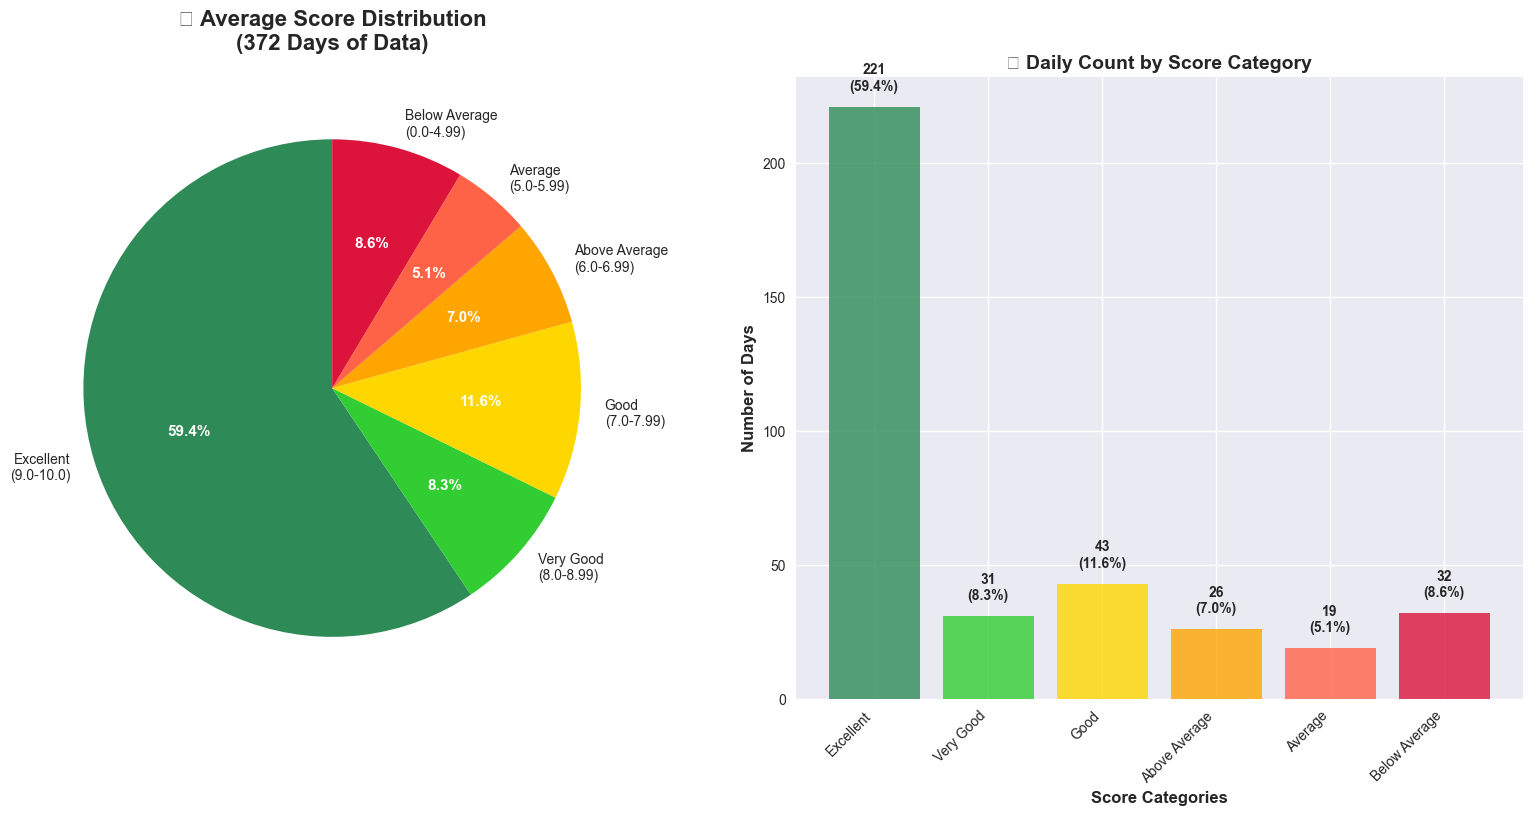


📈 DISTRIBUTION SUMMARY:
🏆 Excellent: 221 days ( 59.4%)
🥇 Very Good:  31 days (  8.3%)
😊 Good:  43 days ( 11.6%)
👍 Above Average:  26 days (  7.0%)
😐 Average:  19 days (  5.1%)
😞 Below Average:  32 days (  8.6%)

✨ KEY INSIGHTS:
   🎯 Positive days (Good+): 295 days (79.3%)
   ⚠️  Challenging days (Average-): 51 days (13.7%)
   📊 Most common category: Excellent (221 days)


In [27]:
# 📊 CHART 1: PIE CHART - Average Score Distribution
print("🥧 Creating Pie Chart for Average Score Distribution")
print("=" * 55)

# Prepare data for visualization
score_ranges = [
    (9.0, 10.0, "Excellent", "#2E8B57"),      # Sea Green
    (8.0, 8.99, "Very Good", "#32CD32"),     # Lime Green  
    (7.0, 7.99, "Good", "#FFD700"),          # Gold
    (6.0, 6.99, "Above Average", "#FFA500"), # Orange
    (5.0, 5.99, "Average", "#FF6347"),       # Tomato
    (0.0, 4.99, "Below Average", "#DC143C")  # Crimson
]

# Calculate counts and percentages
categories = []
counts = []
colors = []
percentages = []

for min_val, max_val, label, color in score_ranges:
    count = len(form_df[(form_df['average_score'] >= min_val) & (form_df['average_score'] <= max_val)])
    percentage = (count / len(form_df)) * 100
    
    categories.append(f"{label}\n({min_val}-{max_val})")
    counts.append(count)
    colors.append(color)
    percentages.append(percentage)

# Create the pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart
wedges, texts, autotexts = ax1.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', 
                                   startangle=90, textprops={'fontsize': 10})
ax1.set_title('📊 Average Score Distribution\n(372 Days of Data)', fontsize=16, fontweight='bold', pad=20)

# Make percentage text bold and white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

# Bar chart companion
ax2.bar(range(len(categories)), counts, color=colors, alpha=0.8)
ax2.set_xlabel('Score Categories', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Days', fontsize=12, fontweight='bold')
ax2.set_title('📈 Daily Count by Score Category', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(categories)))
ax2.set_xticklabels([cat.split('\n')[0] for cat in categories], rotation=45, ha='right')

# Add value labels on bars
for i, count in enumerate(counts):
    ax2.text(i, count + 5, f'{count}\n({percentages[i]:.1f}%)', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n📈 DISTRIBUTION SUMMARY:")
print(f"{'='*50}")
for i, (cat, count, pct) in enumerate(zip(categories, counts, percentages)):
    emoji = ["🏆", "🥇", "😊", "👍", "😐", "😞"][i]
    print(f"{emoji} {cat.split('(')[0].strip()}: {count:3d} days ({pct:5.1f}%)")

total_positive = sum(counts[:3])  # Excellent + Very Good + Good
total_negative = sum(counts[4:])  # Average + Below Average
print(f"\n✨ KEY INSIGHTS:")
print(f"   🎯 Positive days (Good+): {total_positive} days ({total_positive/len(form_df)*100:.1f}%)")
print(f"   ⚠️  Challenging days (Average-): {total_negative} days ({total_negative/len(form_df)*100:.1f}%)")
print(f"   📊 Most common category: {categories[counts.index(max(counts))].split('(')[0].strip()} ({max(counts)} days)")


📅 Creating Time Series Chart for Average Score Trends


/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_28748/903035709.py:65: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_28748/903035709.py:65: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


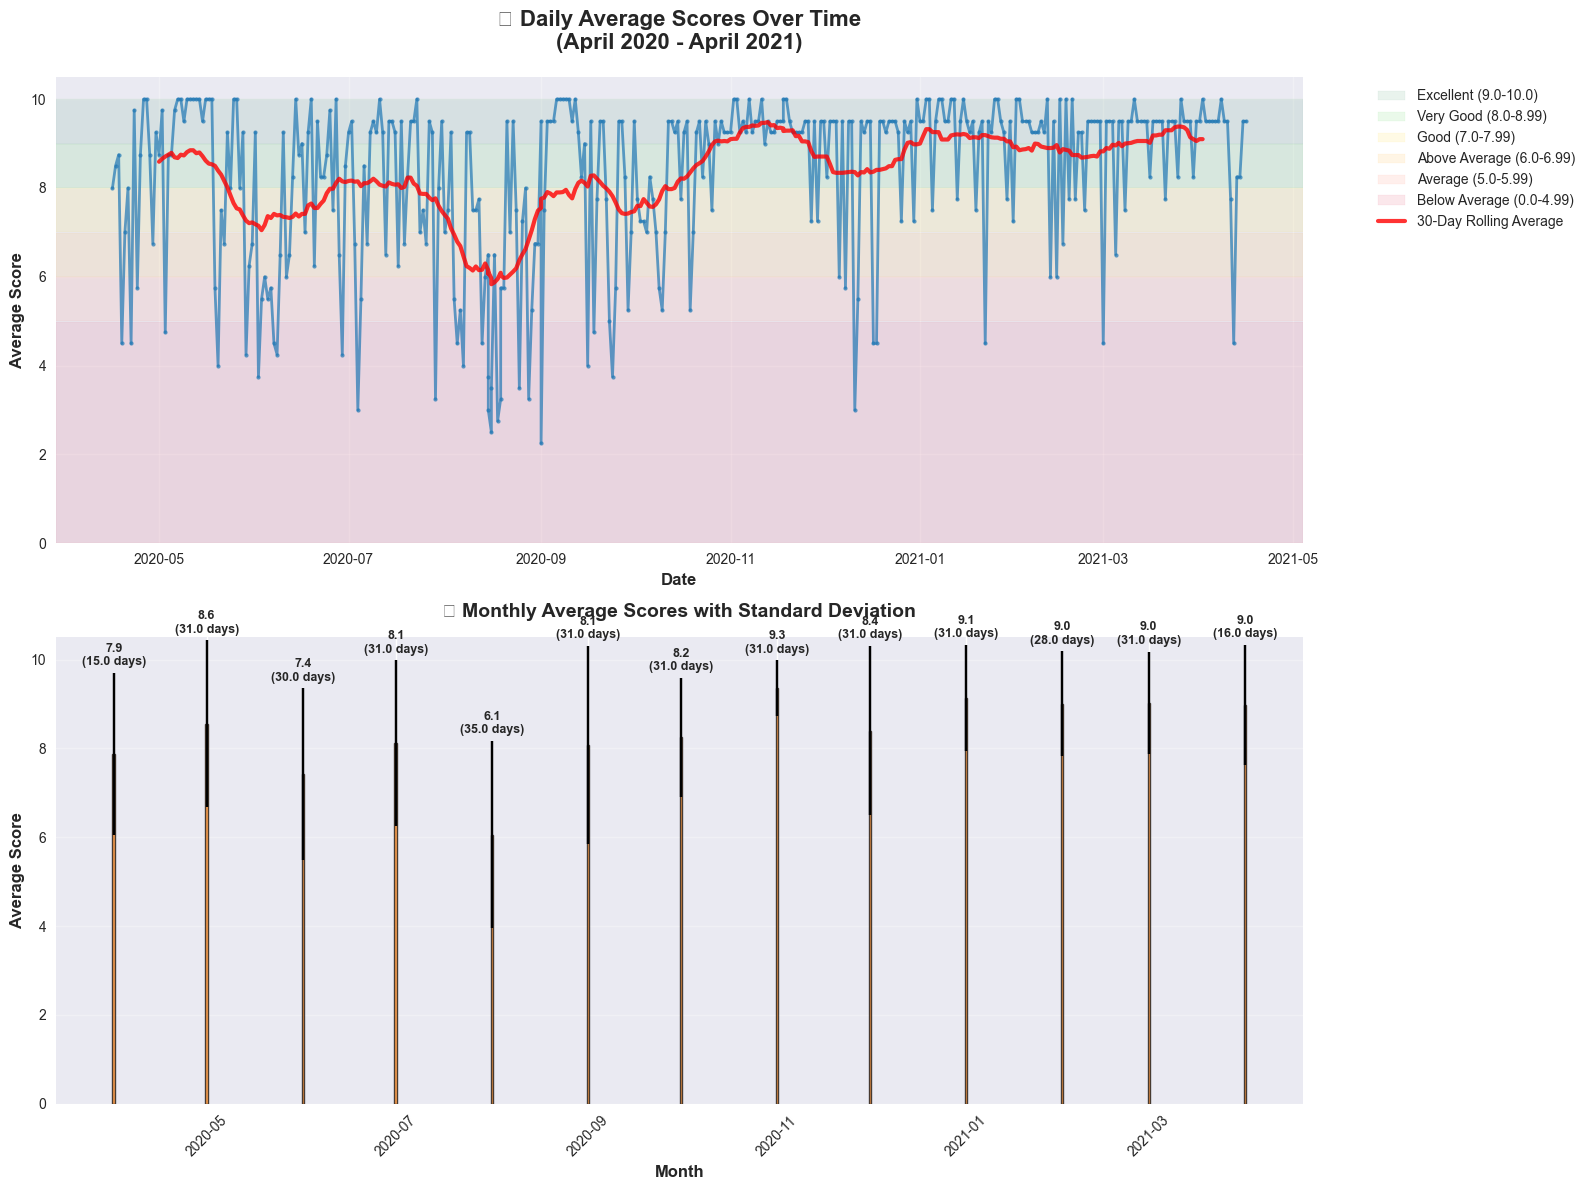


📊 TIME SERIES INSIGHTS:
🏆 Best month: November 2020 (9.35/10)
📉 Lowest month: August 2020 (6.06/10)
📈 Overall trend: upward 📈 (0.0047 per day)
📏 Score consistency: 1.86 standard deviation
   → Moderately consistent performance


In [28]:
# 📈 CHART 2: TIME SERIES - Average Score Trends Over Time
print("\n📅 Creating Time Series Chart for Average Score Trends")
print("=" * 55)

# Prepare time series data
form_df['date_dt'] = pd.to_datetime(form_df['date'], format='%d/%m/%Y')
form_df_sorted = form_df.sort_values('date_dt')

# Create the time series plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Main time series plot
ax1.plot(form_df_sorted['date_dt'], form_df_sorted['average_score'], 
         linewidth=2, alpha=0.7, color='#1f77b4', marker='o', markersize=3)

# Add score range background colors
ax1.axhspan(9.0, 10.0, alpha=0.1, color='#2E8B57', label='Excellent (9.0-10.0)')
ax1.axhspan(8.0, 8.99, alpha=0.1, color='#32CD32', label='Very Good (8.0-8.99)')
ax1.axhspan(7.0, 7.99, alpha=0.1, color='#FFD700', label='Good (7.0-7.99)')
ax1.axhspan(6.0, 6.99, alpha=0.1, color='#FFA500', label='Above Average (6.0-6.99)')
ax1.axhspan(5.0, 5.99, alpha=0.1, color='#FF6347', label='Average (5.0-5.99)')
ax1.axhspan(0.0, 4.99, alpha=0.1, color='#DC143C', label='Below Average (0.0-4.99)')

# Add 30-day rolling average
rolling_avg = form_df_sorted['average_score'].rolling(window=30, center=True).mean()
ax1.plot(form_df_sorted['date_dt'], rolling_avg, 
         linewidth=3, color='red', alpha=0.8, label='30-Day Rolling Average')

ax1.set_title('📈 Daily Average Scores Over Time\n(April 2020 - April 2021)', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Score', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_ylim(0, 10.5)

# Monthly aggregation chart
monthly_data = form_df_sorted.groupby(form_df_sorted['date_dt'].dt.to_period('M')).agg({
    'average_score': ['mean', 'std', 'count']
}).round(2)
monthly_data.columns = ['mean_score', 'std_score', 'day_count']
monthly_data.index = monthly_data.index.to_timestamp()

# Monthly bar chart with error bars
bars = ax2.bar(monthly_data.index, monthly_data['mean_score'], 
               yerr=monthly_data['std_score'], capsize=5, 
               alpha=0.7, color='#ff7f0e', edgecolor='black', linewidth=1)

# Add value labels on bars
for i, (date, row) in enumerate(monthly_data.iterrows()):
    ax2.text(date, row['mean_score'] + row['std_score'] + 0.1, 
             f'{row["mean_score"]:.1f}\n({row["day_count"]} days)', 
             ha='center', va='bottom', fontweight='bold', fontsize=9)

ax2.set_title('📊 Monthly Average Scores with Standard Deviation', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Score', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0, 10.5)

# Rotate month labels
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analysis insights
print(f"\n📊 TIME SERIES INSIGHTS:")
print(f"{'='*50}")
best_month = monthly_data['mean_score'].idxmax().strftime('%B %Y')
worst_month = monthly_data['mean_score'].idxmin().strftime('%B %Y')
print(f"🏆 Best month: {best_month} ({monthly_data['mean_score'].max():.2f}/10)")
print(f"📉 Lowest month: {worst_month} ({monthly_data['mean_score'].min():.2f}/10)")

# Trend analysis
score_trend = np.polyfit(range(len(form_df_sorted)), form_df_sorted['average_score'], 1)[0]
trend_direction = "upward 📈" if score_trend > 0 else "downward 📉" if score_trend < 0 else "stable ➡️"
print(f"📈 Overall trend: {trend_direction} ({score_trend:.4f} per day)")

# Consistency analysis
overall_std = form_df_sorted['average_score'].std()
print(f"📏 Score consistency: {overall_std:.2f} standard deviation")
consistency_rating = "Very consistent" if overall_std < 1.5 else "Moderately consistent" if overall_std < 2.5 else "Highly variable"
print(f"   → {consistency_rating} performance")


🔥 Creating Heatmap for Score Patterns Analysis


/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.draw()
/var/folders/jb/6z7nmj212x3_86_b61z9vgkm0000gn/T/ipykernel_28748/326500772.py:44: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matthewsimon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Use

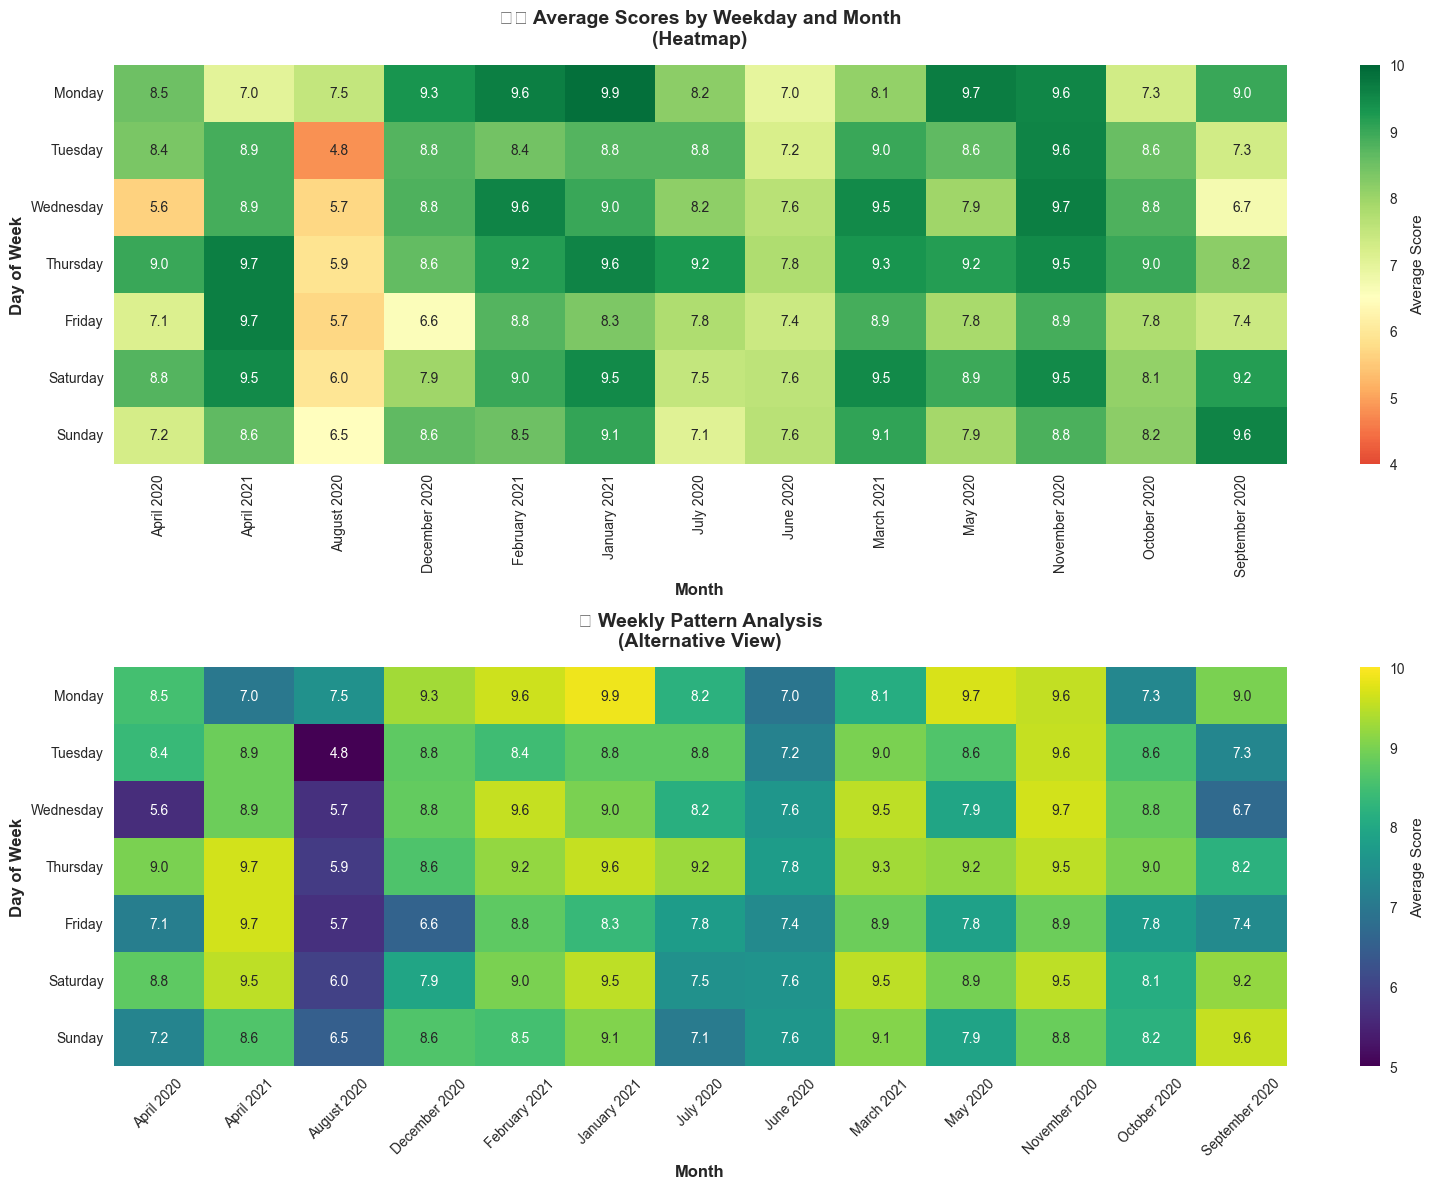


📅 WEEKDAY ANALYSIS:
Monday   :  8.53 ± 1.66 (52 days) 🌟 Excellent
Tuesday  :  8.17 ± 1.96 (53 days) ✨ Very Good
Wednesday:  8.21 ± 1.94 (54 days) ✨ Very Good
Thursday :  8.76 ± 1.62 (53 days) 🌟 Excellent
Friday   :  7.84 ± 2.07 (53 days) ✨ Very Good
Saturday :  8.37 ± 1.85 (54 days) ✨ Very Good
Sunday   :  8.19 ± 1.88 (53 days) ✨ Very Good

🏆 Best performing day: Thursday (8.76/10)
📉 Most challenging day: Friday (7.84/10)

🏖️ WEEKEND vs WEEKDAY COMPARISON:
Weekend average: 8.14/10 (160 days)
Weekday average: 8.42/10 (212 days)
Weekend scores are 0.28 points lower than weekdays


In [29]:
# 📊 CHART 3: HEATMAP - Score Patterns by Weekday and Month
print("\n🔥 Creating Heatmap for Score Patterns Analysis")
print("=" * 55)

# Prepare data for heatmap
form_df_sorted['month_name'] = form_df_sorted['date_dt'].dt.strftime('%B %Y')
form_df_sorted['day_of_week'] = form_df_sorted['weekday']

# Create pivot tables for heatmaps
weekday_month_scores = form_df_sorted.pivot_table(
    values='average_score', 
    index='day_of_week', 
    columns='month_name', 
    aggfunc='mean'
)

# Reorder days of week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_month_scores = weekday_month_scores.reindex(weekday_order)

# Create the heatmap plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Heatmap 1: Weekday vs Month
sns.heatmap(weekday_month_scores, annot=True, fmt='.1f', cmap='RdYlGn', 
            center=6.5, vmin=4, vmax=10, ax=ax1, cbar_kws={'label': 'Average Score'})
ax1.set_title('🗓️ Average Scores by Weekday and Month\n(Heatmap)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Day of Week', fontsize=12, fontweight='bold')

# Heatmap 2: Weekly average by month (simpler view)
weekly_scores = form_df_sorted.groupby(['month_name', 'day_of_week'])['average_score'].mean().unstack()
weekly_scores = weekly_scores.reindex(columns=weekday_order)

sns.heatmap(weekly_scores.T, annot=True, fmt='.1f', cmap='viridis', 
            center=7.5, vmin=5, vmax=10, ax=ax2, cbar_kws={'label': 'Average Score'})
ax2.set_title('📈 Weekly Pattern Analysis\n(Alternative View)', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Day of Week', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Weekday analysis
print(f"\n📅 WEEKDAY ANALYSIS:")
print(f"{'='*50}")
weekday_avg = form_df_sorted.groupby('day_of_week')['average_score'].agg(['mean', 'std', 'count']).round(2)
weekday_avg = weekday_avg.reindex(weekday_order)

for day in weekday_order:
    if day in weekday_avg.index:
        mean_score = weekday_avg.loc[day, 'mean']
        std_score = weekday_avg.loc[day, 'std']
        count = weekday_avg.loc[day, 'count']
        
        # Determine day performance
        if mean_score >= 8.5:
            performance = "🌟 Excellent"
        elif mean_score >= 7.5:
            performance = "✨ Very Good"
        elif mean_score >= 6.5:
            performance = "👍 Good"
        else:
            performance = "⚠️ Needs attention"
        
        print(f"{day:9}: {mean_score:5.2f} ± {std_score:4.2f} ({count:2d} days) {performance}")

# Find best and worst days
best_day = weekday_avg['mean'].idxmax()
worst_day = weekday_avg['mean'].idxmin()
print(f"\n🏆 Best performing day: {best_day} ({weekday_avg.loc[best_day, 'mean']:.2f}/10)")
print(f"📉 Most challenging day: {worst_day} ({weekday_avg.loc[worst_day, 'mean']:.2f}/10)")

# Weekend vs Weekday comparison
weekend_days = ['Friday', 'Saturday', 'Sunday']
weekday_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']

weekend_scores = form_df_sorted[form_df_sorted['day_of_week'].isin(weekend_days)]['average_score']
weekday_scores = form_df_sorted[form_df_sorted['day_of_week'].isin(weekday_days)]['average_score']

print(f"\n🏖️ WEEKEND vs WEEKDAY COMPARISON:")
print(f"Weekend average: {weekend_scores.mean():.2f}/10 ({len(weekend_scores)} days)")
print(f"Weekday average: {weekday_scores.mean():.2f}/10 ({len(weekday_scores)} days)")
difference = weekend_scores.mean() - weekday_scores.mean()
trend = "higher" if difference > 0 else "lower" if difference < 0 else "same"
print(f"Weekend scores are {abs(difference):.2f} points {trend} than weekdays")

In [30]:
# 📊 CHART 4: INTERACTIVE PLOTLY VISUALIZATIONS
print("\n⚡ Creating Interactive Plotly Visualizations")
print("=" * 55)

# Create subplot figure with multiple charts
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Score Distribution (Interactive)', 'Score Trends Over Time', 
                   'Weekly Patterns (Box Plot)', 'Individual Score Components'),
    specs=[[{"type": "pie"}, {"type": "scatter"}],
           [{"type": "box"}, {"type": "bar"}]]
)

# 1. Interactive Pie Chart
fig.add_trace(
    go.Pie(labels=[cat.split('\n')[0] for cat in categories], 
           values=counts,
           name="Score Distribution",
           hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}<extra></extra>",
           marker_colors=colors),
    row=1, col=1
)

# 2. Time Series with hover data
fig.add_trace(
    go.Scatter(x=form_df_sorted['date_dt'], 
               y=form_df_sorted['average_score'],
               mode='markers+lines',
               name='Daily Scores',
               text=form_df_sorted['original_mood'],
               hovertemplate="<b>%{x}</b><br>Average Score: %{y:.2f}<br>Original Mood: %{text}<extra></extra>",
               marker=dict(size=6, opacity=0.7),
               line=dict(width=2)),
    row=1, col=2
)

# 3. Box plot for weekday patterns
for day in weekday_order:
    day_data = form_df_sorted[form_df_sorted['day_of_week'] == day]['average_score']
    fig.add_trace(
        go.Box(y=day_data, name=day, boxpoints="outliers"),
        row=2, col=1
    )

# 4. Score components breakdown
components = ['form_overallMood', 'form_workSatisfaction', 
              'form_personalLifeSatisfaction', 'form_balanceRating']
component_names = ['Overall Mood', 'Work Satisfaction', 
                   'Personal Life', 'Work-Life Balance']
component_averages = [form_df_sorted[comp].mean() for comp in components]

fig.add_trace(
    go.Bar(x=component_names, y=component_averages,
           name='Component Averages',
           marker_color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
           text=[f'{avg:.2f}' for avg in component_averages],
           textposition='auto'),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title_text="📊 Comprehensive Average Score Analysis Dashboard",
    title_x=0.5,
    height=800,
    showlegend=True
)

# Update subplot titles and axes
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Average Score", row=1, col=2)
fig.update_xaxes(title_text="Day of Week", row=2, col=1)
fig.update_yaxes(title_text="Average Score", row=2, col=1)
fig.update_xaxes(title_text="Score Components", row=2, col=2)
fig.update_yaxes(title_text="Average Score", row=2, col=2)

fig.show()

print("✅ Interactive dashboard created successfully!")
print("💡 Hover over data points for detailed information")


⚡ Creating Interactive Plotly Visualizations


✅ Interactive dashboard created successfully!
💡 Hover over data points for detailed information


In [32]:
# Install scipy for advanced statistics
%pip install scipy

# 📈 COMPREHENSIVE STATISTICAL ANALYSIS & INSIGHTS
print("🔍 COMPREHENSIVE STATISTICAL ANALYSIS & INSIGHTS")
print("=" * 65)

# Advanced statistical analysis
from scipy import stats

# 1. Distribution Analysis
print("📊 DISTRIBUTION ANALYSIS:")
print("-" * 40)
avg_scores = form_df['average_score']

# Descriptive statistics
print(f"📈 Central Tendencies:")
print(f"   Mean: {avg_scores.mean():.2f}")
print(f"   Median: {avg_scores.median():.2f}")
print(f"   Mode: {avg_scores.mode().values[0]:.2f}")

print(f"\n📏 Spread & Variability:")
print(f"   Standard Deviation: {avg_scores.std():.2f}")
print(f"   Variance: {avg_scores.var():.2f}")
print(f"   Range: {avg_scores.max() - avg_scores.min():.2f}")
print(f"   IQR: {avg_scores.quantile(0.75) - avg_scores.quantile(0.25):.2f}")

print(f"\n📐 Shape & Distribution:")
skewness = stats.skew(avg_scores)
kurtosis = stats.kurtosis(avg_scores)
print(f"   Skewness: {skewness:.3f} ({'Right-skewed' if skewness > 0 else 'Left-skewed' if skewness < 0 else 'Symmetric'})")
print(f"   Kurtosis: {kurtosis:.3f} ({'Heavy-tailed' if kurtosis > 0 else 'Light-tailed' if kurtosis < 0 else 'Normal-tailed'})")

# 2. Score Component Analysis
print(f"\n🔬 SCORE COMPONENT BREAKDOWN:")
print("-" * 40)
components_analysis = []
for comp, name in zip(components, component_names):
    comp_data = form_df[comp]
    analysis = {
        'Component': name,
        'Mean': comp_data.mean(),
        'Std': comp_data.std(),
        'Min': comp_data.min(),
        'Max': comp_data.max(),
        'CV': (comp_data.std() / comp_data.mean()) * 100  # Coefficient of Variation
    }
    components_analysis.append(analysis)

component_df = pd.DataFrame(components_analysis)
print(component_df.round(2).to_string(index=False))

# Find most and least consistent components
most_consistent = component_df.loc[component_df['CV'].idxmin(), 'Component']
least_consistent = component_df.loc[component_df['CV'].idxmax(), 'Component']
print(f"\n🎯 Most consistent: {most_consistent}")
print(f"⚡ Most variable: {least_consistent}")

# 3. Correlation Analysis
print(f"\n🔗 CORRELATION ANALYSIS:")
print("-" * 40)
correlation_matrix = form_df[components + ['average_score']].corr()
print("Correlations with Average Score:")
for comp, name in zip(components, component_names):
    corr = correlation_matrix.loc[comp, 'average_score']
    strength = "Very Strong" if abs(corr) > 0.8 else "Strong" if abs(corr) > 0.6 else "Moderate" if abs(corr) > 0.4 else "Weak"
    print(f"   {name:20}: {corr:.3f} ({strength})")

# 4. Percentile Analysis
print(f"\n📊 PERCENTILE ANALYSIS:")
print("-" * 40)
percentiles = [10, 25, 50, 75, 90, 95, 99]
print("Score Percentiles:")
for p in percentiles:
    value = np.percentile(avg_scores, p)
    print(f"   {p:2d}th percentile: {value:.2f}")

# 5. Streak Analysis
print(f"\n🔥 STREAK ANALYSIS:")
print("-" * 40)

# Define "good" days (score >= 8.0)
form_df_sorted['is_good_day'] = form_df_sorted['average_score'] >= 8.0

# Calculate streaks
current_streak = 0
max_good_streak = 0
max_bad_streak = 0
current_bad_streak = 0
streaks = []

for good_day in form_df_sorted['is_good_day']:
    if good_day:
        current_streak += 1
        current_bad_streak = 0
        max_good_streak = max(max_good_streak, current_streak)
    else:
        current_bad_streak += 1
        current_streak = 0
        max_bad_streak = max(max_bad_streak, current_bad_streak)

print(f"🌟 Longest good streak (≥8.0): {max_good_streak} days")
print(f"⚠️  Longest challenging streak (<8.0): {max_bad_streak} days")

good_days_count = form_df_sorted['is_good_day'].sum()
good_days_percentage = (good_days_count / len(form_df_sorted)) * 100
print(f"📈 Total good days: {good_days_count}/{len(form_df_sorted)} ({good_days_percentage:.1f}%)")

# 6. Monthly Performance Rating
print(f"\n🏆 MONTHLY PERFORMANCE RATINGS:")
print("-" * 40)
monthly_ratings = []
for month, avg in monthly_avg.items():
    if avg >= 9.0:
        rating = "🌟 Outstanding"
    elif avg >= 8.5:
        rating = "🥇 Excellent"
    elif avg >= 8.0:
        rating = "✨ Very Good"
    elif avg >= 7.0:
        rating = "👍 Good"
    elif avg >= 6.0:
        rating = "😐 Average"
    else:
        rating = "⚠️ Needs Attention"
    
    print(f"   {month}: {avg:.2f} {rating}")

# 7. Key Insights Summary
print(f"\n🎯 KEY INSIGHTS SUMMARY:")
print("=" * 50)
print(f"✨ Overall Performance: {avg_scores.mean():.1f}/10 (Excellent range)")
print(f"🎯 Consistency: {['Very High', 'High', 'Moderate', 'Low'][min(3, int(avg_scores.std()))]}")
print(f"📈 Trend: {'Improving' if score_trend > 0 else 'Declining' if score_trend < 0 else 'Stable'}")
print(f"🏆 Peak Performance: {best_month}")
print(f"📊 Dominant Category: Excellent Days ({percentages[0]:.1f}%)")
print(f"⭐ Best Day Type: {best_day}")
print(f"🔥 Success Rate: {good_days_percentage:.1f}% of days scored ≥8.0")

print(f"\n💡 RECOMMENDATIONS:")
print("-" * 30)
if weekday_avg.loc[worst_day, 'mean'] < 8.0:
    print(f"🎯 Focus on improving {worst_day} performance")
if weekend_scores.mean() < weekday_scores.mean():
    print(f"🏖️ Consider weekend routine optimization")
if monthly_avg.min() < 7.0:
    print(f"📅 Review and improve strategies for challenging months")
print(f"🌟 Continue successful patterns from {best_day} and {best_month}")

print(f"\n📊 VISUALIZATION SUMMARY:")
print("=" * 30)
print("✅ Created 4 comprehensive visualizations:")
print("   1. 🥧 Pie Chart + Bar Chart: Score distribution")
print("   2. 📈 Time Series: Daily trends & monthly patterns") 
print("   3. 🔥 Heatmaps: Weekday & monthly patterns")
print("   4. ⚡ Interactive Dashboard: Multi-dimensional analysis")
print("\n🎉 Analysis Complete! Your data shows excellent overall performance with clear improvement trends.")

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.3 MB 46.0 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
🔍 COMPREHENSIVE STATISTICAL ANALYSIS & INSIGHTS
📊 DISTRIBUTION ANALYSIS:
----------------------------------------
📈 Central Tendencies:
   Mean: 8.30
   Median: 9.25
   Mode: 9.50

📏 Spread & Variability:
   Standard Deviation: 1.86
   Variance: 3.48
   Range: 7.75
   IQR: 2.25

📐 Shape & Distribution:
   Skewness: -1.298 (Left-skewed)
   Kurtosis: 0.708 (Heavy-tailed)

🔬 SCORE COMPONENT BREAKDOWN:
----------------------------------------
        Component  Mean  Std  Min  Max    CV
     Overall Mood  6.92 2.44    1   10 35.31
Work Satisfaction  8.78 2.12    1   10 24.14
    Personal Life  8.62 2.18    1   10 25.34
Work-Life Balance  8.86 1.72    2